## California Housing Case Study
Erstellen Sie einen Berciht mit Code, Ergebnissen und Ihren Interpretationen in Jupyter Notebook

### 1. Laden Sie den Californie Housing Datensatz von sklearn

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
df = fetch_california_housing(as_frame=True).frame

### 2. Beantworten sie folgende Fragen:

#### Wie alt sind die Häuser im Median?

In [7]:
print(df['HouseAge'].median())

29.0


#### Wie alt beim 75ten Quantil?

In [8]:
print(df['HouseAge'].quantile(0.75))

37.0


#### Wie viele Räume haben die Häuser mit den meisten Räumen?

In [25]:
print(df.loc[df['AveRooms'].idxmax()])

MedInc           1.875000
HouseAge        33.000000
AveRooms       141.909091
AveBedrms       25.636364
Population      30.000000
AveOccup         2.727273
Latitude        38.910000
Longitude     -120.100000
MedHouseVal      5.000010
Name: 1914, dtype: float64


#### Wie viel verdienen die Bewohner der nördlichsten Häuser? Sind sie reich?

In [10]:
print("Einkommen nördlichste Häuser: ", df.loc[df['Latitude'].idxmin(), 'MedInc'])
print("Median Einkommen aller Daten: ", df['MedInc'].median())

Einkommen nördlichste Häuser:  1.2667
Median Einkommen aller Daten:  3.5347999999999997


Verglichen mit dem Median Einkommen aller Häusergruppen sind die Bewohner der nördlichsten Häuser nicht reich.

#### Wie viele Menschen wohnen in einem Haus in dem am dünnsten besiedelsten Gebiet?

In [11]:
print(df.loc[df['Population'].idxmin(), 'AveOccup'])

0.75


### 3. Suchen Sie nach Missing Values oder None-Werten im Datensatz

In [16]:
print(df.isna().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [2]:
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


### 4. Schreiben Sie einen Befehl um die Missing Values beim Einkommen mit einem Durschnittswert zu füllen

Es gibt keine Missing Values

### 5. Erzeugen Sie ein Streudiagramm zwischen Einkommen und Verkaufswert der Häuser. Berechnen Sie auch die Korrelation

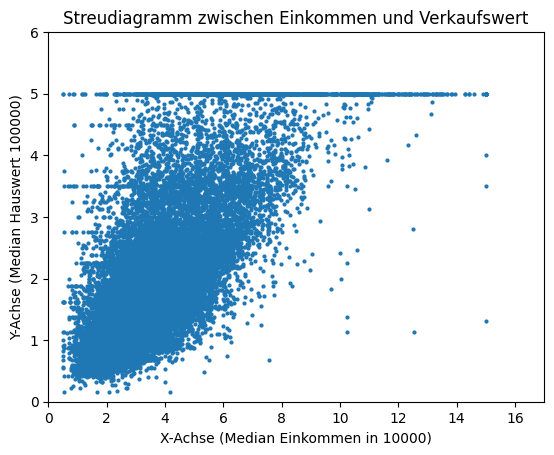

In [27]:
import matplotlib.pyplot as plt

x = df['MedInc']
y = df['MedHouseVal']

plt.scatter(x, y, s=4)
plt.xlim(0, 17)
plt.ylim(0, 6)

plt.title('Streudiagramm zwischen Einkommen und Verkaufswert')
plt.xlabel('X-Achse (Median Einkommen in 10000)')
plt.ylabel('Y-Achse (Median Hauswert 100000)')
plt.show()

In [28]:
print(df['MedInc'].corr(df['MedHouseVal']))

0.6880752079585478


### 6. Führen Sie eine Regressionsanalyse durch (Abh. Variable: Verkaufswert; Unabh. Variable Einkommen)

In [30]:
import numpy as np

from matplotlib.pyplot import subplots
import statsmodels.api as sm

# Modellmatrix erzeugen ud mit 1en für Intercept füllen
x = pd.DataFrame({'intercept': np.ones(df.shape[0]), 'MedInc': df['MedInc']})

# Responsevariable definieren
y = df['MedHouseVal']

# Model spezifizieren
model = sm.OLS(y, x)

# Model fitten
results = model.fit()

# Regressionstabelle auswerten
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:05:42   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4509      0.013     34.082      0.000       0.425       0.477
MedInc         0.4179      0.003    136.223      0.000       0.412       0.424
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

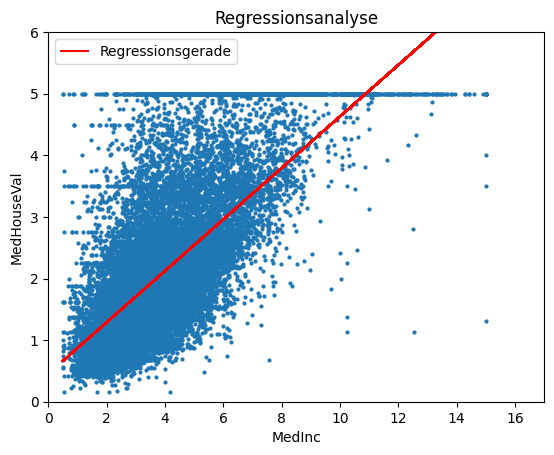

In [39]:
#Streudiagramm Einkommen und Verkaufswert
plt.scatter(x['MedInc'], y, s=4)  # Scatter-Plot der echten Wert
plt.xlim(0, 17)
plt.ylim(0, 6)

#Regressionsgerade aus der Analyse
y_pred = results.predict(x) #man möchte für die x-Werte, die man eingegeben hat die entrpechenden voraussagen
plt.plot(x['MedInc'], y_pred, label='Regressionsgerade', color='red')  # Regressionsgerade

plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Regressionsanalyse')
plt.legend()
plt.show()
